In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger le dataset
file_path = "C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\final_dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# nombre de compagnies aériennes unique
NB = df["AIRLINE"].nunique()
print(f"Nombre de compagnies aériennes: {NB}")

KeyError: 'AIRLINE'

In [4]:
# Vérifier les données
display(df.head())
display(df.info())

,DISTANCE,SCHEDULED_TIME,MONTH,DAY_OF_WEEK,PRICE_USD,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,DEPARTURE_PERIOD_matin,DEPARTURE_PERIOD_soir
0,1448,205.0,1,4,565.65,0.0,1.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,True,False
1,2330,280.0,1,4,1074.03,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,True,False
2,2296,286.0,1,4,977.53,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,True,False
3,2342,285.0,1,4,1101.60,1.0,0.0,0.0,0.0,0.0,...,0,2,0,0,0,0,0,0,True,False
4,1448,235.0,1,4,661.43,0.0,1.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729195 entries, 0 to 5729194
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DISTANCE                int64  
 1   SCHEDULED_TIME          float64
 2   MONTH                   int64  
 3   DAY_OF_WEEK             int64  
 4   PRICE_USD               float64
 5   AIRLINE_AA              float64
 6   AIRLINE_AS              float64
 7   AIRLINE_B6              float64
 8   AIRLINE_DL              float64
 9   AIRLINE_EV              float64
 10  AIRLINE_F9              float64
 11  AIRLINE_HA              float64
 12  AIRLINE_MQ              float64
 13  AIRLINE_NK              float64
 14  AIRLINE_OO              float64
 15  AIRLINE_UA              float64
 16  AIRLINE_US              float64
 17  AIRLINE_VX              float64
 18  AIRLINE_WN              float64
 19  col_0                   int64  
 20  col_1                   int64  
 21  col_2                   int64  

None

In [5]:
# Séparation des features (X) et target (y)
X = df.drop(columns=["PRICE_USD"])
y = df["PRICE_USD"]

In [6]:
# Division en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalisation des variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Entraînement de plusieurs modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n[INFO] Entraînement du modèle: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Évaluation du modèle
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Comparaison des performances
df_results = pd.DataFrame(results).T
print(df_results)


[INFO] Entraînement du modèle: Régression Linéaire
MAE: 46.75, RMSE: 70.93, R²: 0.89

[INFO] Entraînement du modèle: Random Forest
MAE: 37.50, RMSE: 58.98, R²: 0.92

[INFO] Entraînement du modèle: XGBoost
MAE: 35.29, RMSE: 54.61, R²: 0.93
                           MAE       RMSE        R2
Régression Linéaire  46.754917  70.933236  0.886687
Random Forest        37.498525  58.982397  0.921653
XGBoost              35.292394  54.607939  0.932843


<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_38872\389721942.py:23: SyntaxWarning: invalid escape sequence '\D'
  joblib.dump(best_model, "C:\\Users\\ADMIN\Desktop\\air_paradise_chatbot\\models\\best_flight_price_model.pkl")


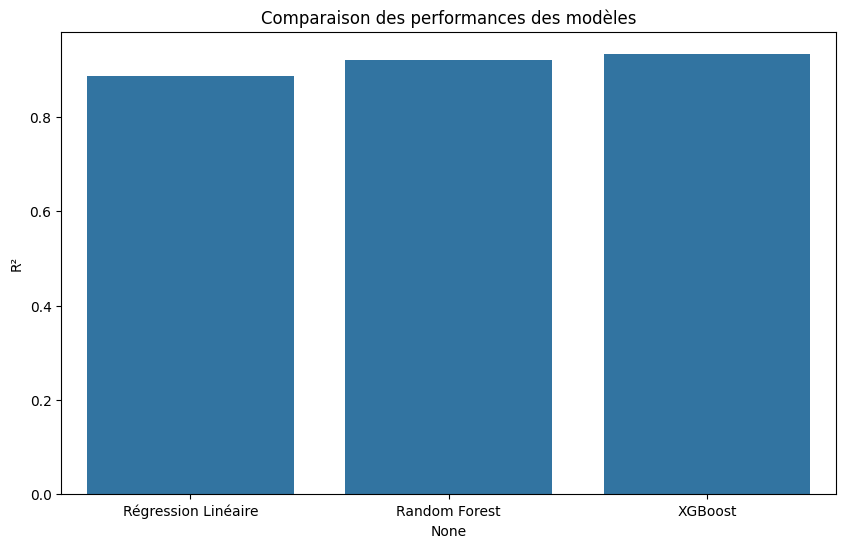

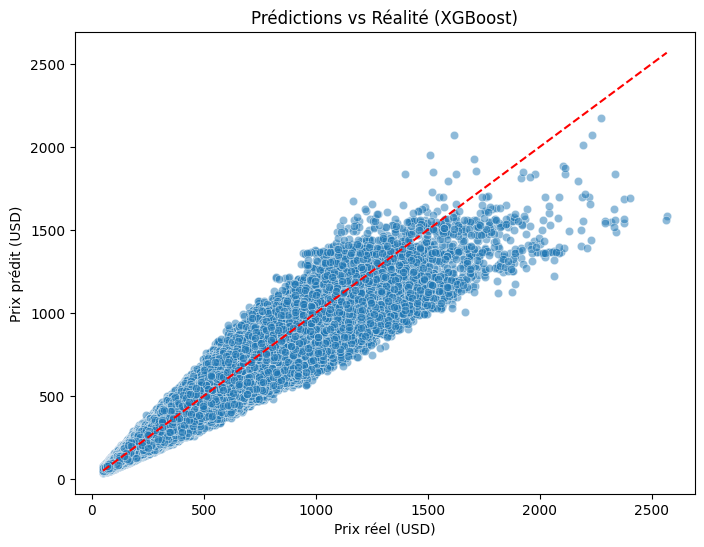

[INFO] Modèle XGBoost sauvegardé sous 'best_flight_price_model.pkl'


In [12]:
# Visualisation des performances
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x=df_results.index, y="R2")
plt.title("Comparaison des performances des modèles")
plt.ylabel("R²")
plt.show()

# Visualisation des prédictions vs valeurs réelles
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Prix réel (USD)")
plt.ylabel("Prix prédit (USD)")
plt.title(f"Prédictions vs Réalité ({best_model_name})")
plt.show()

# Sauvegarde du modèle entraîné
import joblib
joblib.dump(best_model, "C:\\Users\\ADMIN\Desktop\\air_paradise_chatbot\\models\\best_flight_price_model.pkl")
print(f"[INFO] Modèle {best_model_name} sauvegardé sous 'best_flight_price_model.pkl'")


In [ ]:

model = joblib.load("C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\models\\best_flight_price_model.pkl")


# Charger un exemple de données à prédire
file_path = "C:\\Users\\ADMIN\\Desktop\\air_paradise_chatbot\\data\\final\\final_dataset.csv"
df = pd.read_csv(file_path)

# Supposons que la colonne cible soit "PRICE_USD", on enlève cette colonne
X = df.drop(columns=["PRICE_USD"], errors="ignore")

# Prédire les prix des billets d'avion
predictions = model.predict(X)

# Afficher les prédictions
print(predictions)

[1531.7719 1531.7719 1531.7719 ... 1631.7631 1631.7631 1631.7631]


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


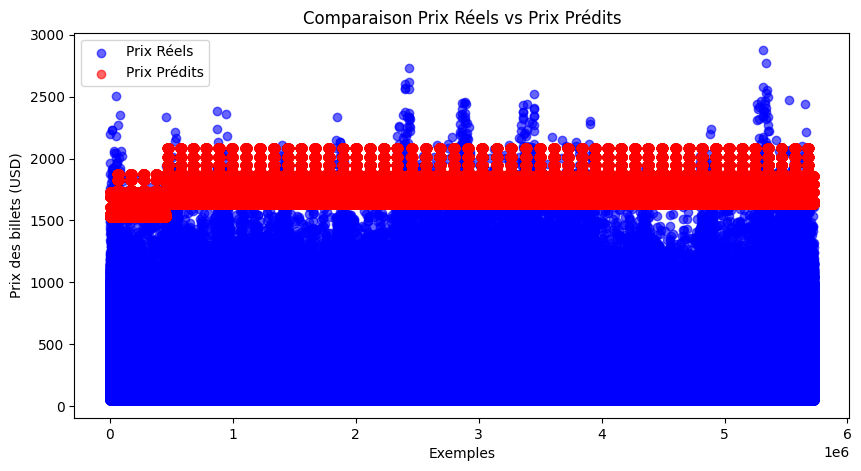

In [16]:
import matplotlib.pyplot as plt

# Charger les données réelles
y_real = df["PRICE_USD"][:len(predictions)]  # Assure que les tailles correspondent

# Tracer la comparaison
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_real)), y_real, color="blue", label="Prix Réels", alpha=0.6)
plt.scatter(range(len(predictions)), predictions, color="red", label="Prix Prédits", alpha=0.6)
plt.xlabel("Exemples")
plt.ylabel("Prix des billets (USD)")
plt.title("Comparaison Prix Réels vs Prix Prédits")
plt.legend()
plt.show()